# Import libraries

Explanation:

pandas: Used for data manipulation and analysis.

numpy: Provides support for arrays and matrices, along with mathematical functions.

matplotlib.pyplot: Used for creating static, animated, and interactive visualizations.

seaborn: Based on matplotlib, it provides a higher-level interface for drawing attractive statistical graphics.

scikit-learn (sklearn): A machine learning library featuring classification, regression, clustering algorithms, and more.

imblearn: Provides tools to deal with imbalanced datasets, such as over-sampling minority classes.

In [1]:
# Data manipulation and analysis
import pandas as pd  # Provides data structures and functions needed to manipulate structured data

# Numerical computing
import numpy as np  # Adds support for large, multi-dimensional arrays and matrices

# Data visualization
import matplotlib.pyplot as plt  # 2D plotting library for creating graphs and plots
import seaborn as sns  # Data visualization library based on matplotlib; provides a high-level interface

# Machine learning models and evaluation
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance
from sklearn.ensemble import RandomForestClassifier  # Ensemble of decision trees
from sklearn.metrics import classification_report, confusion_matrix  # Metrics to evaluate the model

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Load the Dataset

Explanation:

pd.read_csv(): Reads a comma-separated values (CSV) file into a DataFrame.

df.head(): Displays the first five rows of the DataFrame to give an overview of the data.

In [3]:
# Load the dataset from a CSV file
df = pd.read_csv('./data/diabetes_012_health_indicators_BRFSS2015.csv')  # Replace with your actual file path or name

# Display the first five rows of the dataset
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Understand the Data

Explanation:

df.shape: Returns a tuple representing the dimensionality of the DataFrame.

df.info(): Provides a concise summary of the DataFrame.

df.isnull().sum(): Checks for missing values by summing up the number of nulls in each column.

In [4]:
# Get the shape of the dataset (number of rows and columns)
print("Dataset shape:", df.shape)

# Get information about the dataset (data types, non-null values)
df.info()

# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())


Dataset shape: (253680, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               25

# Exploratory Data Analysis (EDA)

## Statistical Summary

In [4]:
# Get statistical summary of the dataset
df.describe()

# TODO: Just go through each of the statistical summary and try to understand what it means. Also, explore how it affects the feature variable.

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Explanation on above statistical distribution

## Class Distribution

Explanation:

sns.countplot(): Shows the counts of observations in each categorical bin using bars.


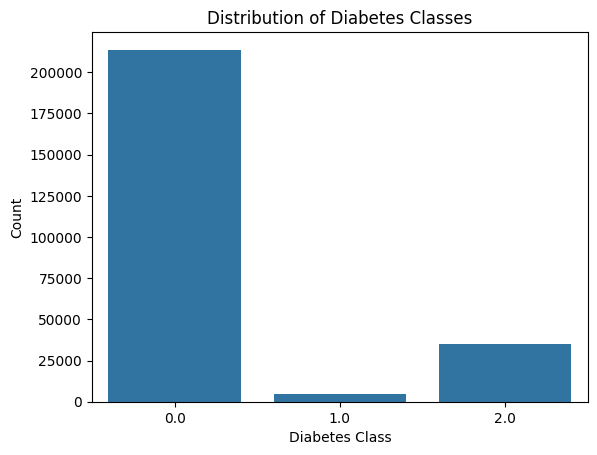

In [7]:
# Visualize the distribution of the target variable
sns.countplot(x='Diabetes_012', data=df)
plt.title('Distribution of Diabetes Classes')
plt.xlabel('Diabetes Class')
plt.ylabel('Count')
plt.show()

# TODO: Try to understand what this graph is saying about the data you have and write it down in findings


## Explanation for the above graph

## Check for Class Imbalance

Class distribution:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


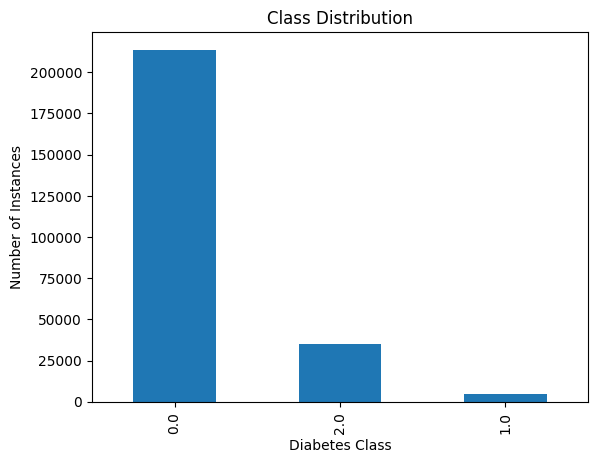

In [8]:
# Calculate the number of instances in each class
class_counts = df['Diabetes_012'].value_counts()
print("Class distribution:")
print(class_counts)

# Plot the class distribution
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Diabetes Class')
plt.ylabel('Number of Instances')
plt.show()

## Correlation Matrix

Explanation:

df.corr(): Calculates the pairwise correlation of columns.

sns.heatmap(): Visualizes the correlation matrix with color-coded cells.

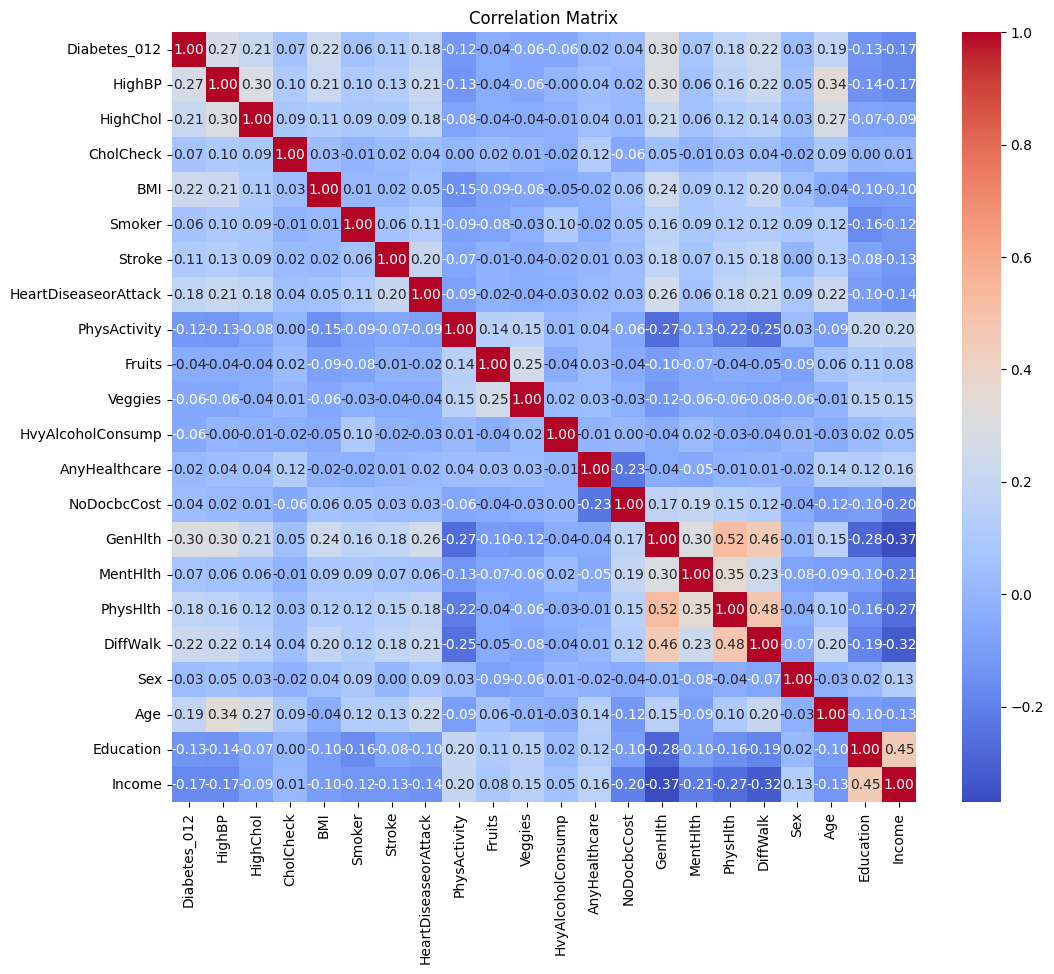

In [7]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# TODO: Provide what you understand from the correlation plot below. Based on this, try to come up which variable might be important and ignored for the final classificaiton task.


## Explanation for above visualization

# Feature Selection

## 1. Univariate Feature Selection

We will statistical tests like chi-squared to evaluate the relationship between each feature and the target. In the code below we are analyzing all the features and selecting top 10 features (given by k=10) essential for analysis.

NOTE: Why Chi-square is used for fearture selection in diabetes classification. why not others?

In [5]:
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target
X = df.drop('Diabetes_012', axis=1) # it has all you fearures data
y = df['Diabetes_012'] # target variables

# Apply SelectKBest with the chi-squared score function
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)

# Get selected feature scores and columns
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
selected_features = feature_scores.sort_values(by='Score', ascending=False)
print("Top Features Based on Chi-squared Test:")
print(selected_features.head(10))


Top Features Based on Chi-squared Test:
                 Feature          Score
15              PhysHlth  141598.783225
14              MentHlth   24607.463010
3                    BMI   19775.252090
0                 HighBP   10731.721009
16              DiffWalk   10627.556856
13               GenHlth   10595.234173
18                   Age   10225.159975
6   HeartDiseaseorAttack    7468.339377
1               HighChol    6483.776499
20                Income    5380.434934


## 2. Recursive Feature Elimination (RFE)

Here we are using a machine learning model (Random Forest Classifer) to iteratively remove less important features.

In [6]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Perform Recursive Feature Elimination
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y)

# Get selected features
selected_rfe_features = pd.DataFrame({'Feature': X.columns, 'Rank': rfe.ranking_})
print("Top Features Based on RFE:")
print(selected_rfe_features[selected_rfe_features['Rank'] == 1])


Top Features Based on RFE:
      Feature  Rank
0      HighBP     1
3         BMI     1
4      Smoker     1
8      Fruits     1
13    GenHlth     1
14   MentHlth     1
15   PhysHlth     1
18        Age     1
19  Education     1
20     Income     1


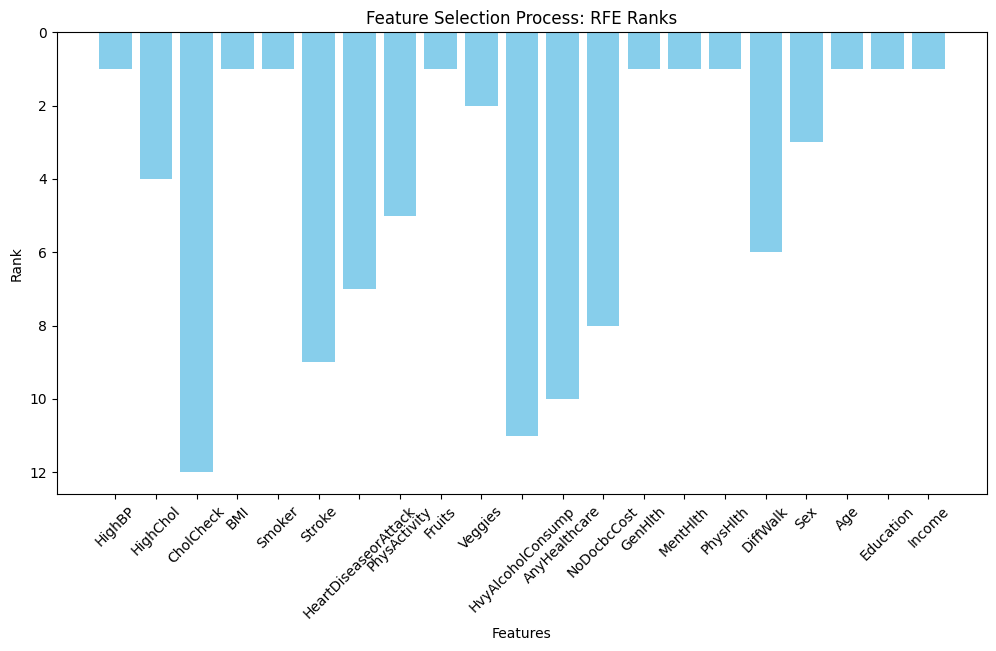

<Figure size 640x480 with 0 Axes>

In [11]:
# Visualize the Feature selection Process (using RFE)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(selected_rfe_features['Feature'], selected_rfe_features['Rank'], color='skyblue')
plt.title('Feature Selection Process: RFE Ranks')
plt.xlabel('Features')
plt.ylabel('Rank')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Correct method to invert the y-axis
plt.show()
plt.savefig("RFE_feature_selection.jpg")

## 3. Feature Importance from Random Forest

We are using a trained Random Forest model to see the feature importance scores and decide which feature may be more important for our analysis.


In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Top Features Based on Random Forest Importance:")
print(feature_importances)

Top Features Based on Random Forest Importance:
                 Feature  Importance
3                    BMI    0.183044
18                   Age    0.123902
20                Income    0.099923
15              PhysHlth    0.084261
19             Education    0.070479
13               GenHlth    0.067701
14              MentHlth    0.065669
0                 HighBP    0.041814
4                 Smoker    0.034049
8                 Fruits    0.033724
17                   Sex    0.028344
9                Veggies    0.027040
1               HighChol    0.026245
7           PhysActivity    0.026142
16              DiffWalk    0.021966
6   HeartDiseaseorAttack    0.017402
12           NoDocbcCost    0.015562
5                 Stroke    0.012036
11         AnyHealthcare    0.009003
10     HvyAlcoholConsump    0.007890
2              CholCheck    0.003803


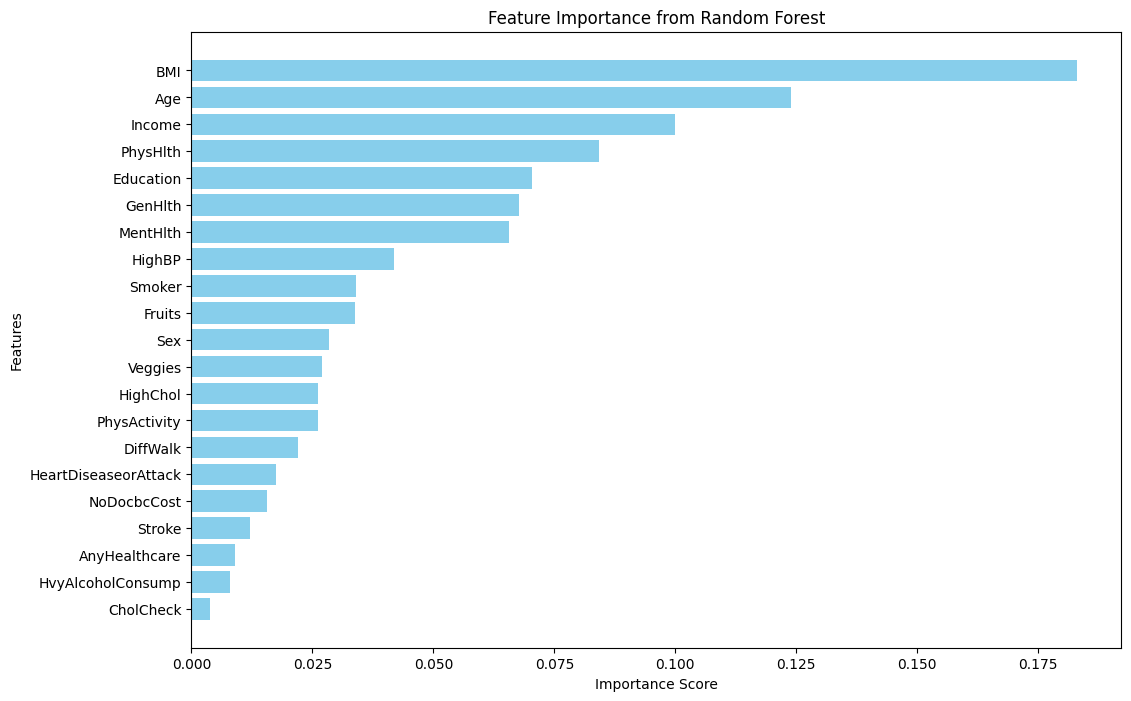

In [ ]:
# Plot the feature importance graph

import matplotlib.pyplot as plt

# Visualize feature importance
def plot_feature_importance(feature_importances):
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
    plt.title('Feature Importance from Random Forest')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
    

# Call the function with your feature_importances DataFrame
plot_feature_importance(feature_importances)


In [17]:
feature_importances[:10]

print(selected_rfe_features[selected_rfe_features['Rank'] == 1], "\n", feature_importances[:10], "\n", selected_features.head(10))


      Feature  Rank
0      HighBP     1
3         BMI     1
4      Smoker     1
8      Fruits     1
13    GenHlth     1
14   MentHlth     1
15   PhysHlth     1
18        Age     1
19  Education     1
20     Income     1 
       Feature  Importance
3         BMI    0.183044
18        Age    0.123902
20     Income    0.099923
15   PhysHlth    0.084261
19  Education    0.070479
13    GenHlth    0.067701
14   MentHlth    0.065669
0      HighBP    0.041814
4      Smoker    0.034049
8      Fruits    0.033724 
                  Feature          Score
15              PhysHlth  141598.783225
14              MentHlth   24607.463010
3                    BMI   19775.252090
0                 HighBP   10731.721009
16              DiffWalk   10627.556856
13               GenHlth   10595.234173
18                   Age   10225.159975
6   HeartDiseaseorAttack    7468.339377
1               HighChol    6483.776499
20                Income    5380.434934


In [18]:
selected_features_for_training = selected_rfe_features[selected_rfe_features['Rank'] == 1]['Feature'].values.tolist() + feature_importances[:10]['Feature'].values.tolist() + selected_features.head(10)['Feature'].values.tolist()

selected_features_for_training = list(set(selected_features_for_training))


print(f"Total no of selected features: {len(selected_features_for_training)}")

selected_features_for_training

Total no of selected features: 13


['BMI',
 'Smoker',
 'HeartDiseaseorAttack',
 'MentHlth',
 'HighChol',
 'PhysHlth',
 'DiffWalk',
 'Fruits',
 'GenHlth',
 'Age',
 'HighBP',
 'Education',
 'Income']

# Class Balancing Techniques

In [ ]:
import pandas as pd
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Diabetes_012', axis=1) # Included nonly feartures in this variable
y = df['Diabetes_012'] # included only targets/labels in this variable


X = X[selected_features_for_training] # Only include those features which are seen as important after feature selection

# Split data into training and testing sets (70-30 % split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Combine X_train and y_train for resampling
train_data = pd.concat([X_train, y_train], axis=1)

# Separate classes
class_0 = train_data[train_data['Diabetes_012'] == 0] # Majority class - downsample (undersampling becuz it is larger)
class_1 = train_data[train_data['Diabetes_012'] == 1] # Minority class - upsample (oversapling becuz it is smallest)
class_2 = train_data[train_data['Diabetes_012'] == 2] # reference class



In [20]:
print(len(class_1))

3242


In [44]:
train_data.head()

,Age,GenHlth,BMI,Income,MentHlth,Education,DiffWalk,HeartDiseaseorAttack,HighBP,HighChol,Fruits,PhysHlth,Smoker,Diabetes_012
2725,8.0,3.0,37.0,1.0,15.0,6.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
119890,10.0,3.0,27.0,8.0,0.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
148149,5.0,1.0,21.0,8.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
91717,11.0,3.0,27.0,8.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,3.0,1.0,0.0
102495,2.0,2.0,31.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# Oversampling (minority class) using SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy={1: y_train.value_counts()[2]}, random_state=42) # Oversample class 1 to same size as class 2

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Optional: Combine oversampled data into a new DataFrame
oversampled_data = pd.concat([pd.DataFrame(X_train_smote, columns=X_train.columns), 
                              pd.Series(y_train_smote, name='Diabetes_012')], axis=1)


Class distribution after SMOTE:
Diabetes_012
0.0    150732
2.0     24742
1.0     24742
Name: count, dtype: int64


In [ ]:
filterd_oversampled_data = oversampled_data[oversampled_data['Diabetes_012']!=0]


In [23]:
# Undersampling majority class

import pandas as pd
from sklearn.utils import resample


# Determine the size for each group (same as class 2 size)
group_size = len(class_2)

# Divide class 0 into multiple groups, each with size similar to class 2
class_0_groups = []
num_groups = len(class_0) // group_size

for i in range(num_groups):
    sampled_group = class_0.sample(n=group_size, random_state=42 + i, replace=False)
    class_0_groups.append(sampled_group)
    # Remove sampled rows to avoid duplication in subsequent groups
    class_0 = class_0.drop(sampled_group.index)

# Add any remaining samples to the last group
if not class_0.empty:
    class_0_groups.append(class_0)

# Verify the size of each group
print("Number of groups created:", len(class_0_groups))
for i, group in enumerate(class_0_groups, start=1):
    print(f"Group {i}: {len(group)} samples")


Number of groups created: 7
Group 1: 24742 samples
Group 2: 24742 samples
Group 3: 24742 samples
Group 4: 24742 samples
Group 5: 24742 samples
Group 6: 24742 samples
Group 7: 1140 samples


In [25]:
for i, group in enumerate(class_0_groups, start=1):
    print(f"Group {i}: {len(group)} samples")
    group.to_csv(f"Group {i}.csv")


Group 1: 24742 samples
Group 2: 24742 samples
Group 3: 24742 samples
Group 4: 24742 samples
Group 5: 24742 samples
Group 6: 24742 samples
Group 7: 1140 samples


# Model Building and Training

## KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Splits your dataset into train/test
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Initialize results storage for KNN
knn_results = []

# Iterate over each group of class 0
for i, group in enumerate(class_0_groups, start=1):
    print(f"Training KNN with group {i} of class 0...")
    
    # Combine current group of class 0 with balanced class 1 and 2 dataset
    combined_training_data = pd.concat([group, filterd_oversampled_data], axis=0)
    X_train = combined_training_data.drop('Diabetes_012', axis=1)
    y_train = combined_training_data['Diabetes_012']
    
    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    # Evaluate KNN
    y_pred_knn = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, y_pred_knn)
    knn_recall = recall_score(y_test, y_pred_knn, average="weighted")
    knn_precision = precision_score(y_test, y_pred_knn, average="weighted")
    knn_f1_score = f1_score(y_test, y_pred_knn, average="weighted")
    knn_report = classification_report(y_test, y_pred_knn, target_names=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
    
    # Store results
    knn_results.append({'Group': i, 'Accuracy': knn_accuracy, 'Recall': knn_recall, 'Precision': knn_precision, 'F1_Score': knn_f1_score,  'Report': knn_report})

# Display KNN results
for result in knn_results:
    print(f"Group {result['Group']} - Accuracy: {result['Accuracy']}\n")
    print(result['Report'])

Training KNN with group 1 of class 0...
Training KNN with group 2 of class 0...
Training KNN with group 3 of class 0...
Training KNN with group 4 of class 0...
Training KNN with group 5 of class 0...
Training KNN with group 6 of class 0...
Training KNN with group 7 of class 0...
Group 1 - Accuracy: 0.5855408388520972

              precision    recall  f1-score   support

 No Diabetes       0.92      0.62      0.74     64111
Pre-Diabetes       0.02      0.29      0.04      1389
    Diabetes       0.29      0.43      0.35     10604

    accuracy                           0.59     76104
   macro avg       0.41      0.45      0.38     76104
weighted avg       0.82      0.59      0.67     76104

Group 2 - Accuracy: 0.5889703563544623

              precision    recall  f1-score   support

 No Diabetes       0.92      0.62      0.74     64111
Pre-Diabetes       0.02      0.30      0.04      1389
    Diabetes       0.30      0.43      0.35     10604

    accuracy                           0.

In [41]:
import csv

keys = knn_results[0].keys()
with open('knn_result.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(knn_results) 




## SVM

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Splits your dataset into train/test
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
from sklearn.svm import SVC

# Initialize results storage for SVM
svm_results = []

# Iterate over each group of class 0
for i, group in enumerate(class_0_groups, start=1):
    print(f"Training SVM with group {i} of class 0...")
    
    # Combine current group of class 0 with balanced class 1 and 2 dataset
    combined_training_data = pd.concat([group, filterd_oversampled_data], axis=0)
    X_train = combined_training_data.drop('Diabetes_012', axis=1)
    y_train = combined_training_data['Diabetes_012']
    
    # Train SVM
    svm = SVC(kernel='rbf', probability=True, random_state=42)
    svm.fit(X_train, y_train)
    
    # Evaluate SVM
    y_pred_svm = svm.predict(X_test)
    svm_accuracy = accuracy_score(y_test, y_pred_svm)
    svm_recall = recall_score(y_test, y_pred_svm, average="weighted")
    svm_precision = precision_score(y_test, y_pred_svm, average="weighted")
    svm_f1_score = f1_score(y_test, y_pred_svm, average="weighted")
    svm_report = classification_report(y_test, y_pred_svm, target_names=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
    
    # Store results
    svm_results.append({'Group': i, 'Accuracy': svm_accuracy, 'Recall': svm_recall, 'Precision': svm_precision, 'F1_Score': svm_f1_score, 'Report': svm_report})

# Display SVM results
for result in svm_results:
    print(f"Group {result['Group']} - Accuracy: {result['Accuracy']}\n")
    print(result['Report'])


Training SVM with group 1 of class 0...
Training SVM with group 2 of class 0...
Training SVM with group 3 of class 0...
Training SVM with group 4 of class 0...
Training SVM with group 5 of class 0...
Training SVM with group 6 of class 0...
Training SVM with group 7 of class 0...
Group 1 - Accuracy: 0.6007699989488069

              precision    recall  f1-score   support

 No Diabetes       0.96      0.61      0.75     64111
Pre-Diabetes       0.03      0.35      0.05      1389
    Diabetes       0.35      0.58      0.44     10604

    accuracy                           0.60     76104
   macro avg       0.45      0.51      0.41     76104
weighted avg       0.86      0.60      0.69     76104

Group 2 - Accuracy: 0.5988778513612951

              precision    recall  f1-score   support

 No Diabetes       0.96      0.61      0.74     64111
Pre-Diabetes       0.03      0.35      0.05      1389
    Diabetes       0.35      0.58      0.44     10604

    accuracy                           0.

In [43]:
import csv

keys = svm_results[0].keys()
with open('SVM_result.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(svm_results) 




## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initialize results storage for Random Forest
rf_results = []

# Iterate over each group of class 0
for i, group in enumerate(class_0_groups, start=1):
    print(f"Training Random Forest with group {i} of class 0...")
    
    # Combine current group of class 0 with balanced class 1 and 2 dataset
    combined_training_data = pd.concat([group, filterd_oversampled_data], axis=0)
    X_train = combined_training_data.drop('Diabetes_012', axis=1)
    y_train = combined_training_data['Diabetes_012']
    
    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Evaluate Random Forest
    y_pred_rf = rf.predict(X_test)
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    rf_recall = recall_score(y_test, y_pred_rf, average="weighted")
    rf_precision = precision_score(y_test, y_pred_rf, average="weighted")
    rf_f1_score = f1_score(y_test, y_pred_rf, average="weighted")
    rf_report = classification_report(y_test, y_pred_rf, target_names=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
    
    # Store results
    rf_results.append({'Group': i, 'Accuracy': rf_accuracy, 'Recall': rf_recall, 'Precision': rf_precision, 'F1_Score': rf_f1_score, 'Report': rf_report})

# Display Random Forest results
for result in rf_results:
    print(f"Group {result['Group']} - Accuracy: {result['Accuracy']}\n")
    print(result['Report'])


Training Random Forest with group 1 of class 0...
Training Random Forest with group 2 of class 0...
Training Random Forest with group 3 of class 0...
Training Random Forest with group 4 of class 0...
Training Random Forest with group 5 of class 0...
Training Random Forest with group 6 of class 0...
Training Random Forest with group 7 of class 0...
Group 1 - Accuracy: 0.6844186902133922

              precision    recall  f1-score   support

 No Diabetes       0.94      0.69      0.79     64111
Pre-Diabetes       0.02      0.01      0.02      1389
    Diabetes       0.28      0.75      0.41     10604

    accuracy                           0.68     76104
   macro avg       0.41      0.48      0.41     76104
weighted avg       0.83      0.68      0.73     76104

Group 2 - Accuracy: 0.684642068748029

              precision    recall  f1-score   support

 No Diabetes       0.94      0.69      0.79     64111
Pre-Diabetes       0.02      0.01      0.01      1389
    Diabetes       0.28    

In [45]:
import csv 

keys = rf_results[0].keys()
with open('rf_result.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(svm_results) 